            VacancyRate  AvailabilityRate  AverageRent  MedianRent  \
Year                                                                 
1990-02-01          1.0          3.812308          634         585   
1990-04-01          1.4          3.812308          454         435   
1990-06-01          0.8          3.812308          559         525   
1990-08-01          0.9          3.812308          689         635   
1990-10-01          1.4          3.812308          842         789   
1991-02-01          1.8          3.812308          672         625   
1991-04-01          2.7          3.812308          482         475   
1991-06-01          1.5          3.812308          592         560   
1991-08-01          1.9          3.812308          730         687   
1991-10-01          2.0          3.812308          888         850   
1992-02-01          2.2          3.812308          691         650   
1992-04-01          3.2          3.812308          493         487   
1992-06-01          

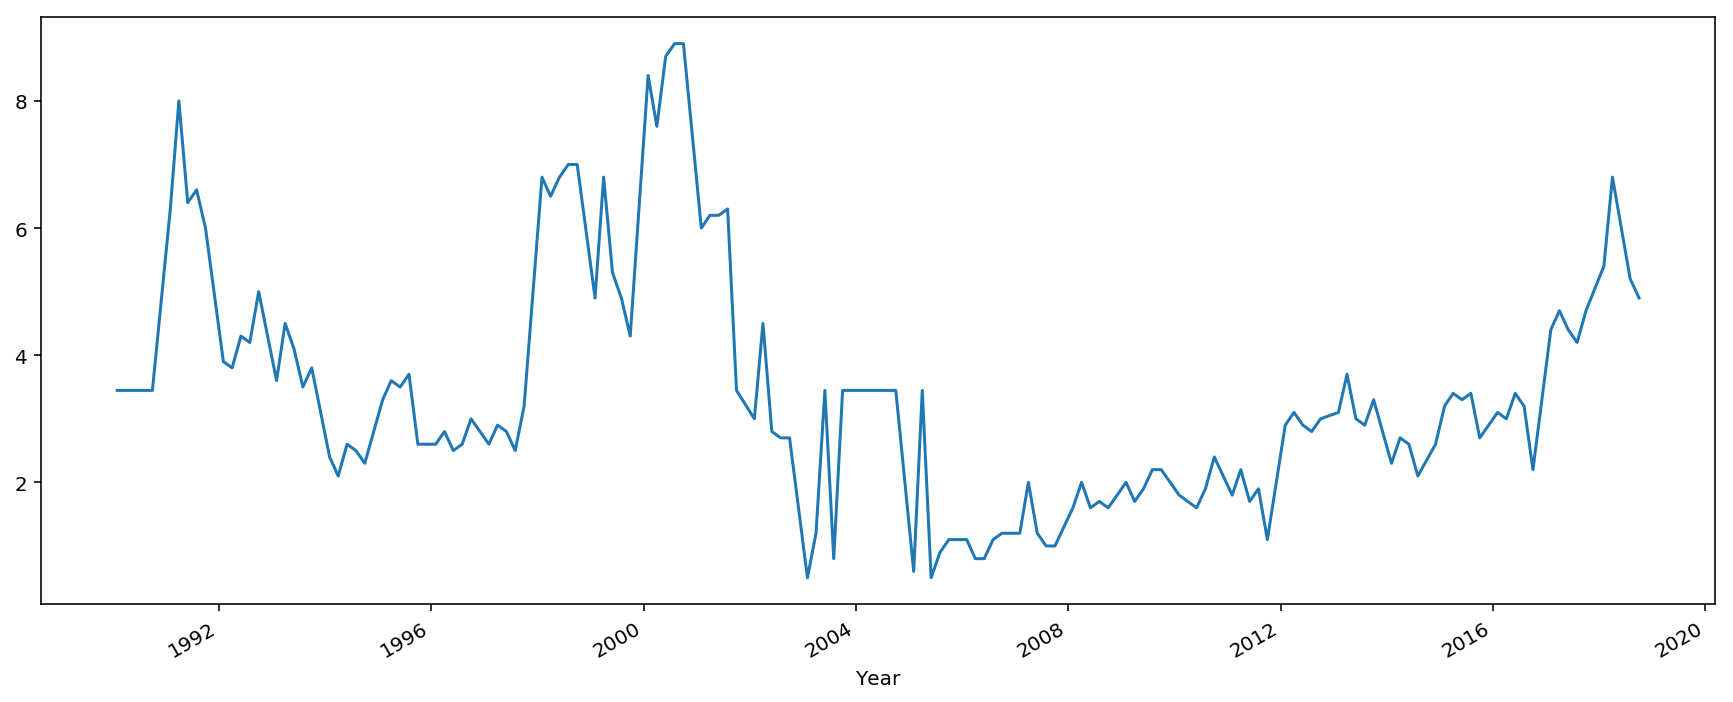

In [1]:
from sklearn.svm import LinearSVC
import numpy as np
import holoviews as hv
import pandas as pd
import seaborn as sns
import matplotlib
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Import Multiple CSVs and combining them

from bokeh.io import show, curdoc
from bokeh.io import output_file, show
from bokeh.layouts import layout
from bokeh.models import Slider, Button
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import curdoc
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Spectral6
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Select
from bokeh.plotting import output_notebook, show
renderer = hv.renderer('bokeh').instance(mode='server')
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
Total_filepath = "C:/Users/Lenovo/Desktop/Rental/Permanent Rental/By Times/Primary Rental Comparision(Apartment)/Total Apartment Toronto_cleaned2.csv"
df5= pd.read_csv(Total_filepath, index_col=['Year'], parse_dates=['Year']) 
df5[df5 == 'NA'] = np.nan
# fill missing values with mean column values
df5.fillna(df5.mean(), inplace=True)
df5=df5.drop(['PropertyType'],axis=1)
print(df5)
y_rental = df5['AverageRent']
y_rental.plot(figsize=(15, 6))
plt.show()


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_rental,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:804.5741903451657
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:656.9659098675933
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:592.7804522333774
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:524.6942742362986
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:584.9433840074951
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:567.5398755826993
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:539.3432474454929
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:523.2923954944968
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:668.5475253591048
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:564.0447614906038
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:528.4478155519143
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:451.9044981820896
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:519.0268505453511
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:488.47809021074556
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 -

In [4]:
mod = sm.tsa.statespace.SARIMAX(y_rental,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0907      0.225     -0.403      0.687      -0.531       0.350
ma.L1         -0.2299      0.227     -1.013      0.311      -0.675       0.215
ar.S.L12      -0.4302      0.070     -6.145      0.000      -0.567      -0.293
sigma2         1.5794      0.172      9.204      0.000       1.243       1.916


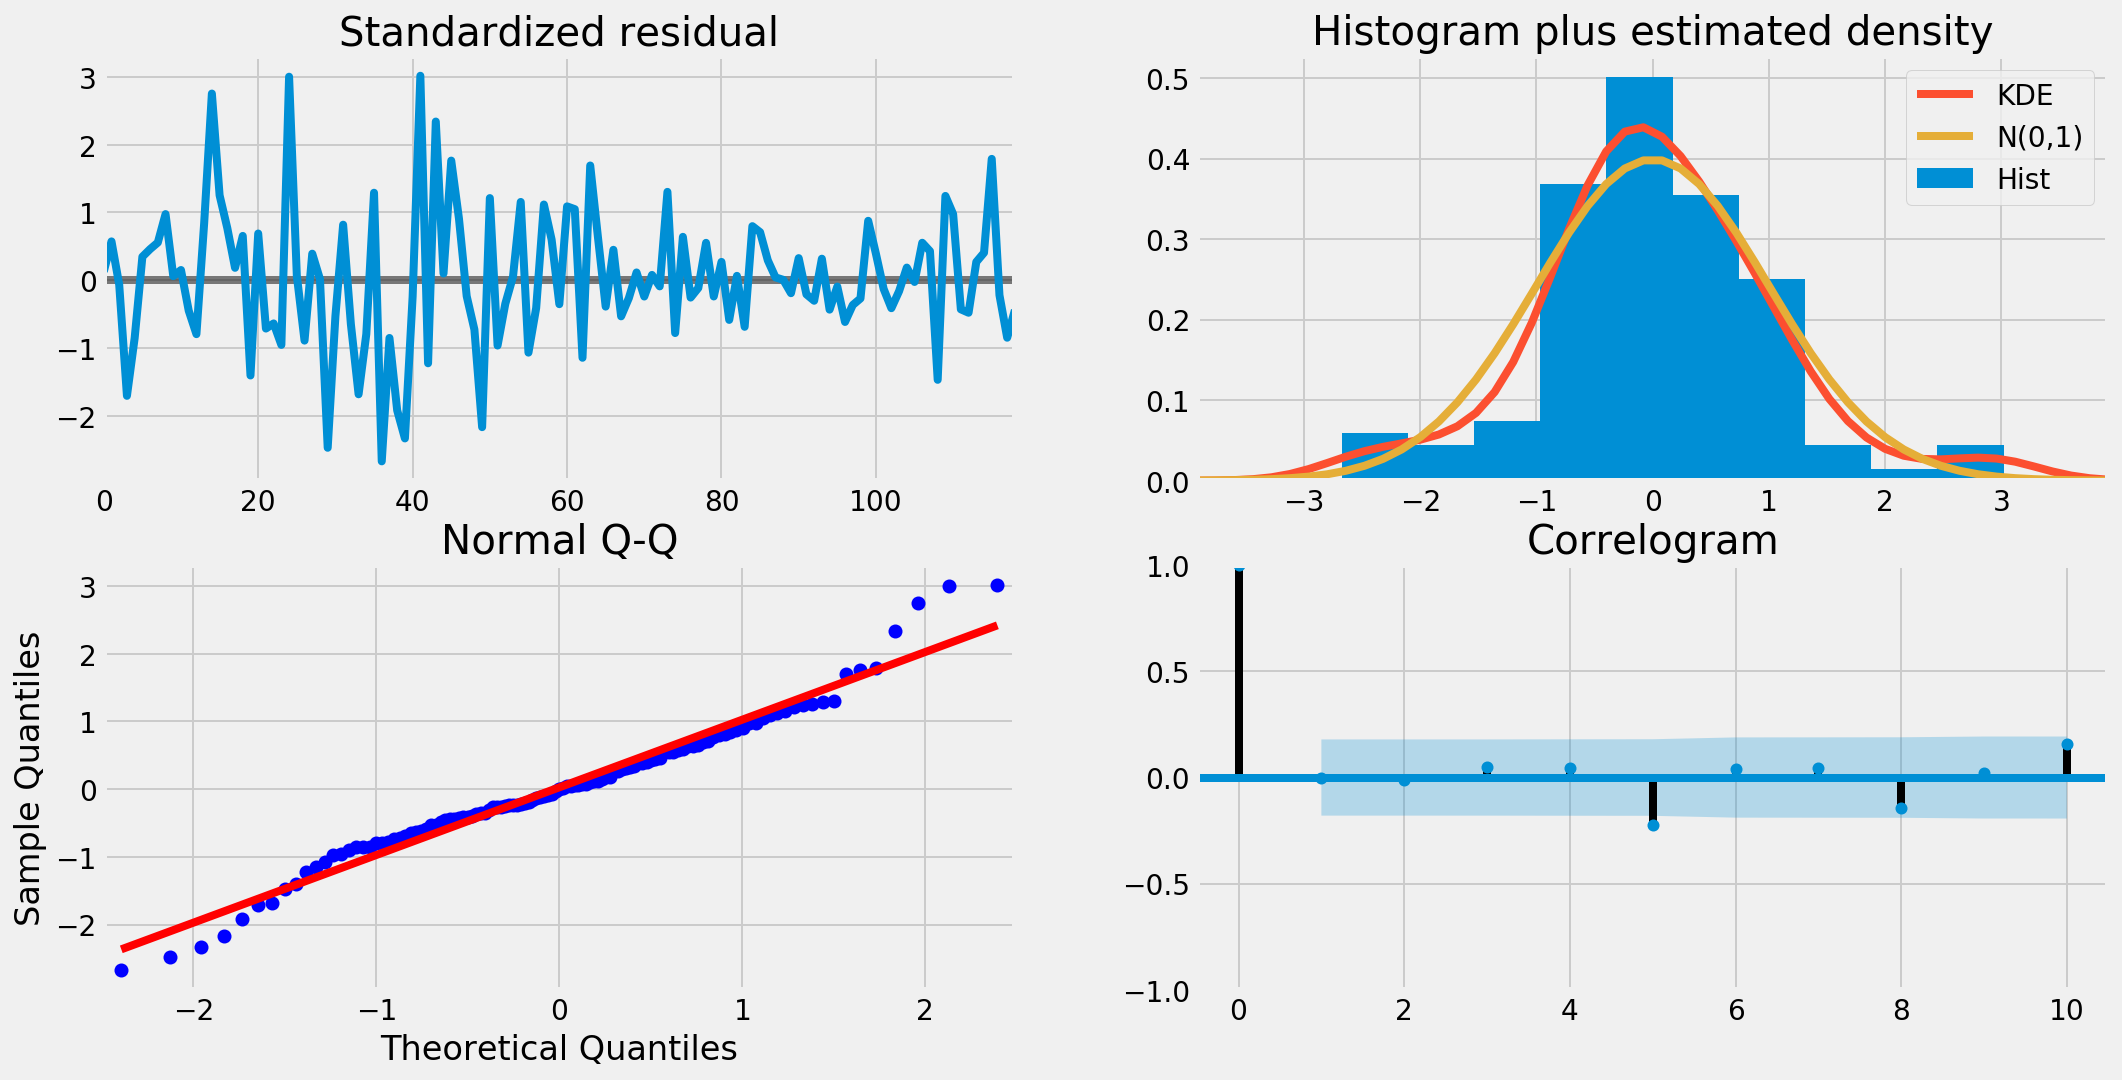

In [5]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

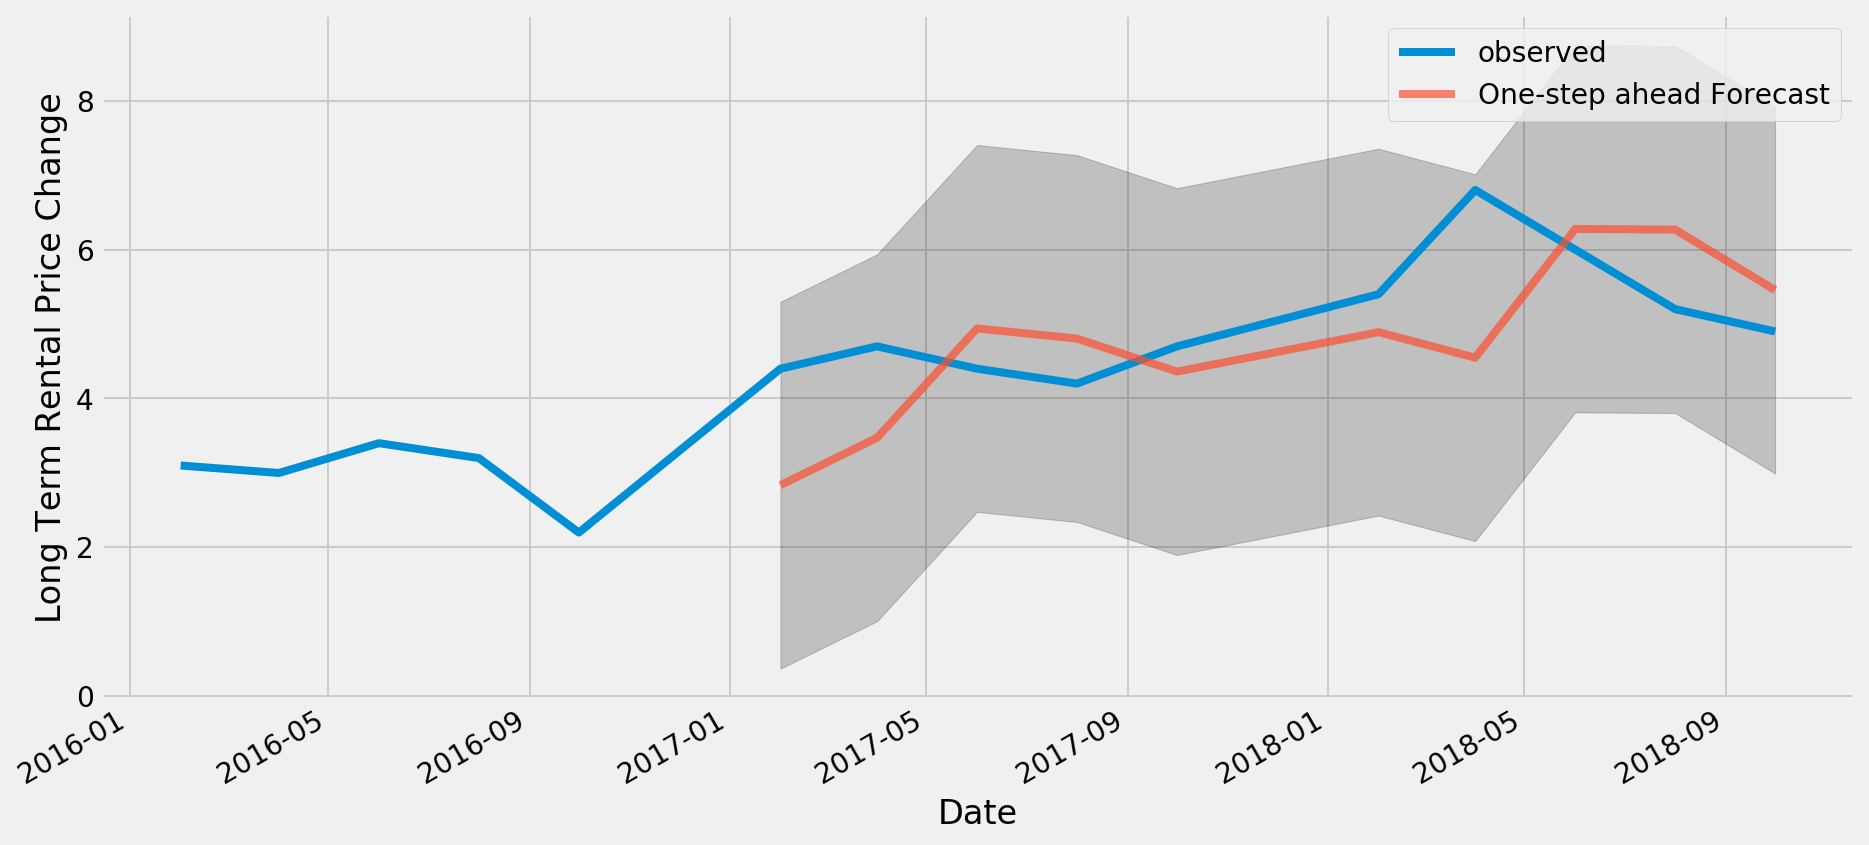

In [9]:
#Validating Forecast
pred = results.get_prediction(start='2017-02-01', dynamic=False)
pred_ci = pred.conf_int()
ax = y_rental['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Long Term Rental Price Change')
plt.legend()
plt.show()

In [7]:
y_forecasted = pred.predicted_mean
y_truth = y_rental['2017-02-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.16
